In [1]:
import pandas as pd
import numpy as np

In [2]:
alc = pd.read_csv(r"C:\5 Machine Learning\ML\Alcohol_Sales.csv")
alc

,DATE,S4248SM144NCEN
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221
...,...,...
320,2018-09-01,12396
321,2018-10-01,13914
322,2018-11-01,14174
323,2018-12-01,15504


In [3]:
alc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DATE            325 non-null    object
 1   S4248SM144NCEN  325 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [4]:
alc.DATE = pd.to_datetime(alc.DATE, infer_datetime_format = True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8012\352449907.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  alc.DATE = pd.to_datetime(alc.DATE, infer_datetime_format = True)


In [5]:
alc = alc.set_index(['DATE'])

In [6]:
alc.rename(columns={'S4248SM144NCEN':'Sales'}, inplace = True)

In [7]:
alc.shape

(325, 1)

In [8]:
import matplotlib.pyplot as plt

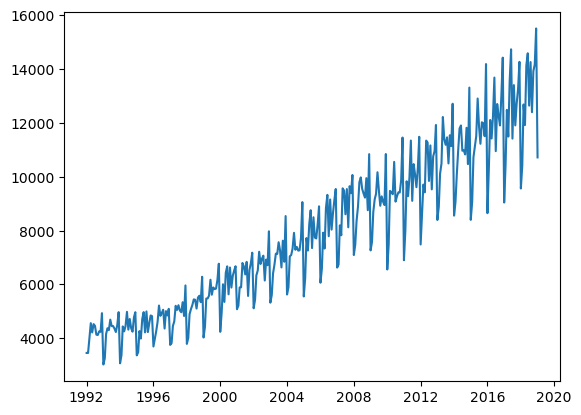

In [9]:
plt.plot(alc)

In [10]:
alc.diff()

,Sales
DATE,
1992-01-01,NaN
1992-02-01,-1.0
1992-03-01,544.0
1992-04-01,562.0
1992-05-01,-343.0
...,...
2018-09-01,-1861.0
2018-10-01,1518.0
2018-11-01,260.0


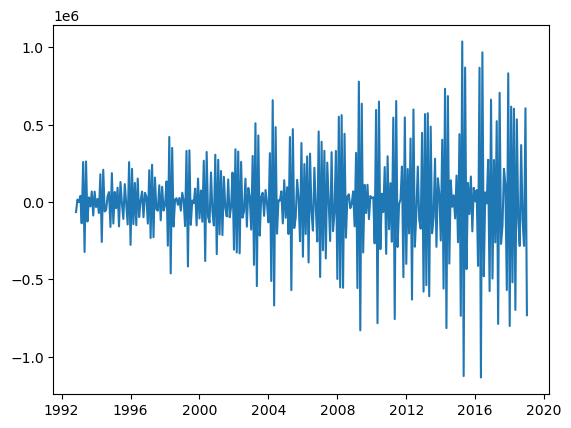

In [11]:
plt.plot(alc.diff().diff().diff().diff().diff().diff().diff().diff().diff().diff())

In [12]:
alc_log = np.log(alc)

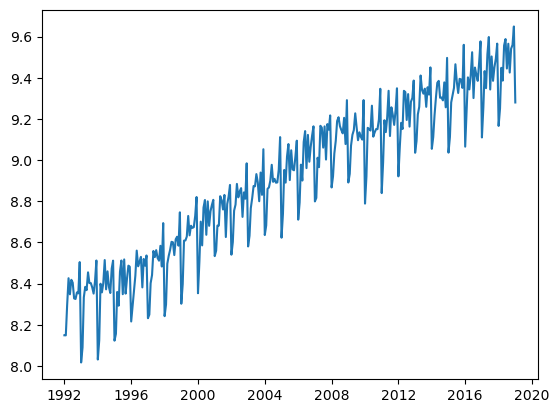

In [13]:
plt.plot(alc_log)

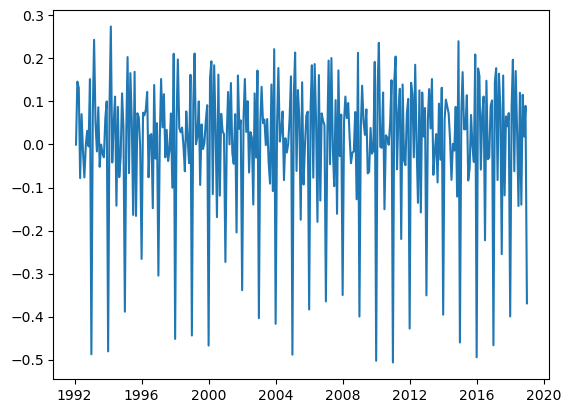

In [14]:
plt.plot(alc_log.diff())

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

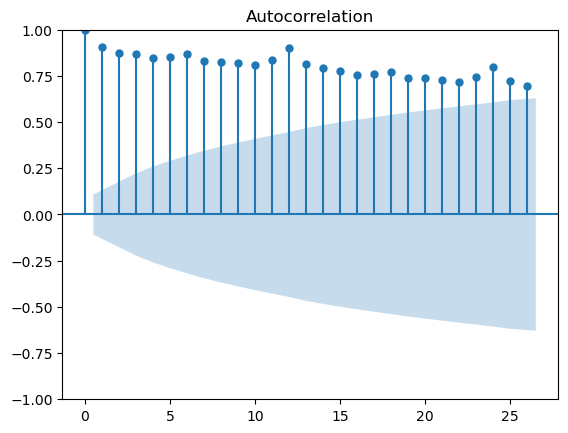

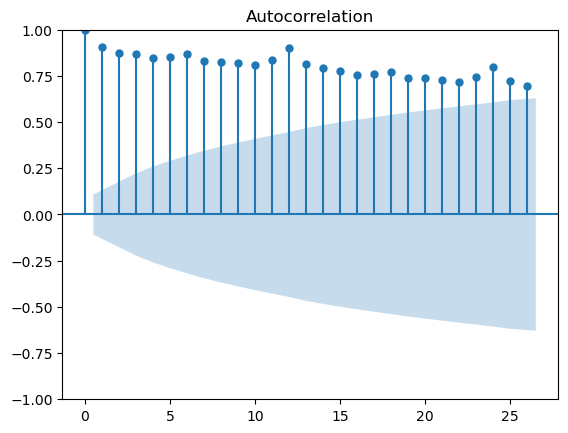

In [16]:
plot_acf(alc_log)

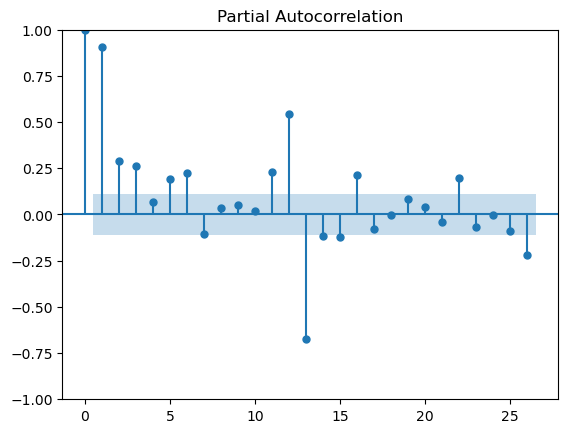

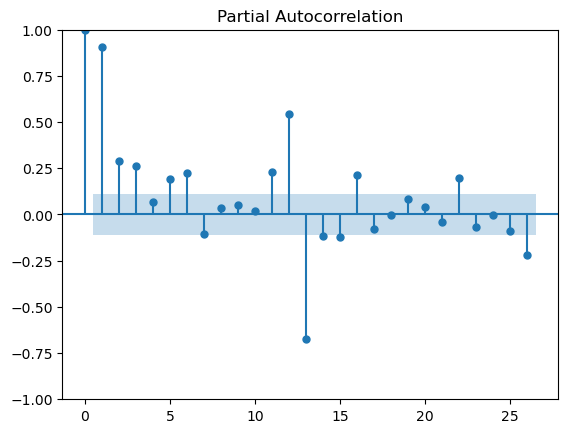

In [17]:
plot_pacf(alc_log)

In [18]:
# p=2, q=0, d=1 ,AR model

In [19]:
from statsmodels.tsa.arima_model import ARIMA

In [20]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

In [21]:
import pmdarima
from pmdarima import auto_arima

In [22]:
result = seasonal_decompose(alc_log)

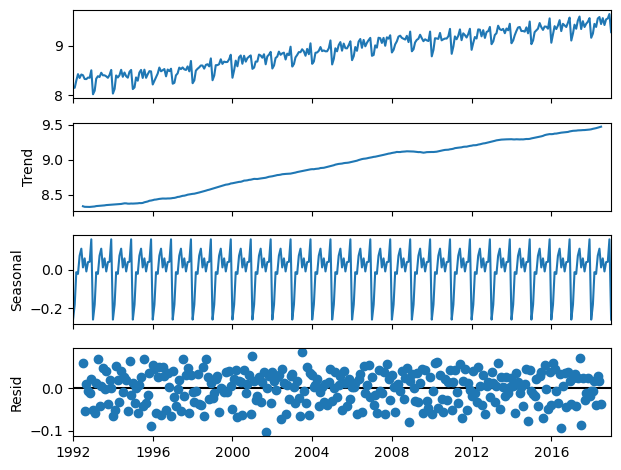

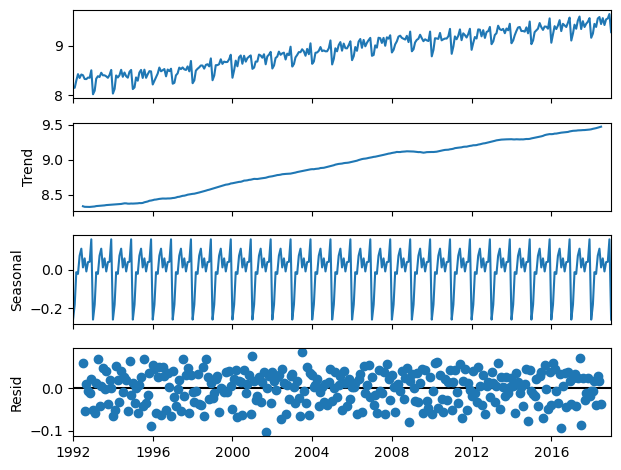

In [31]:
result.plot()

In [24]:
auto_arima(alc_log, seasonal = True, m=12)

ARIMA(order=(3, 1, 1), scoring_args={}, seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [32]:
model_sarima = SARIMAX(alc_log, order=(3,1,1), seasonal_order=(1,0,0,12))

C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [33]:
alc_model= model_sarima.fit()

In [35]:
pred_values = alc_model.predict(start=325, end =336)

In [36]:
pred_values1 = np.exp(pred_values).round()

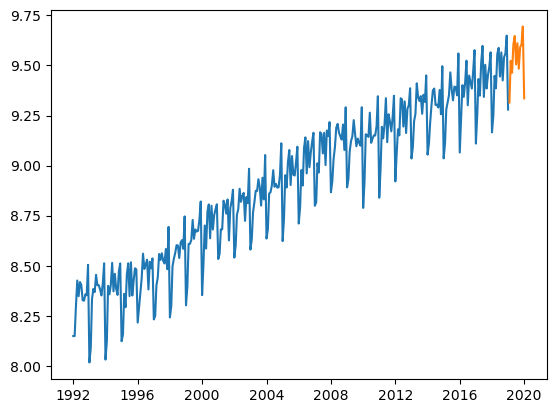

In [37]:
plt.plot(alc_log)
plt.plot(pred_values)

In [29]:
df = pd.DataFrame()
df['Predicted'] = pred_values1
date_for_pred = ['2019-02-01','2019-03-01','2019-04-01','2019-05-01','2019-06-01','2019-07-01','2019-08-01',
                 '2019-09-01','2019-10-01','2019-11-01','2019-12-01','2020-01-01']

df['DATE'] = date_for_pred

df.DATE = pd.to_datetime(df.DATE, infer_datetime_format = True)

df = df.set_index(['DATE'])

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8012\874469242.py:8: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df.DATE = pd.to_datetime(df.DATE, infer_datetime_format = True)


<Axes: xlabel='DATE'>

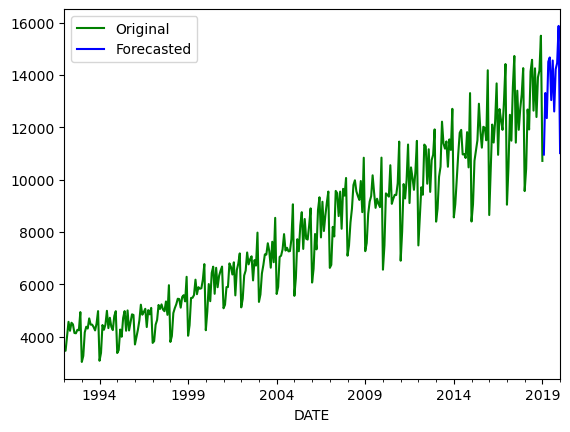

In [38]:
alc['Sales'].plot(legend=True, label='Original', color='green')
df['Predicted'].plot(legend= True, label='Forecasted', color='blue')